In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<a id='Data_loading'></a>
# 1. Data Loading

In [307]:

price1 = pd.read_csv('Data/Data_2012_2014.csv')
price2 = pd.read_csv('Data/Data_2015_2016.csv')
price3 = pd.read_csv('Data/Data_2017_onwards.csv')
cpi = pd.read_csv('Data/CPI.csv')

In [308]:
price1.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [309]:
price2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [310]:
price3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [311]:
# Merge dfs
prices = pd.concat([price1, price2, price3],axis=0,ignore_index=True, sort=False)

prices['month'] = pd.to_datetime(prices['month']) # to datetime
prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250445 entries, 0 to 250444
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                250445 non-null  datetime64[ns]
 1   town                 250445 non-null  object        
 2   flat_type            250445 non-null  object        
 3   block                250445 non-null  object        
 4   street_name          250445 non-null  object        
 5   storey_range         250445 non-null  object        
 6   floor_area_sqm       250445 non-null  float64       
 7   flat_model           250445 non-null  object        
 8   lease_commence_date  250445 non-null  int64         
 9   resale_price         250445 non-null  float64       
 10  remaining_lease      198242 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 21.0+ MB


<a id='Clean'></a>
# 2. Data Cleaning

In [312]:
# Clean flat type
prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
prices['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', '1 ROOM'], dtype=object)

In [313]:
# Rename flat model duplicates
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}
prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()



Model A                 80565
Improved                63185
New Generation          36097
Premium Apartment       26549
Simplified              11222
Apartment                9706
Standard                 7822
Maisonette               7568
Model A2                 3214
DBSS                     3093
Type S1S2                 631
Adjoined flat             421
Terrace                   147
Multi Generation           99
2-room                     56
Executive Maisonette       54
3Gen                       16
Name: flat_model, dtype: int64

In [314]:
prices['storey_range'].unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [315]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

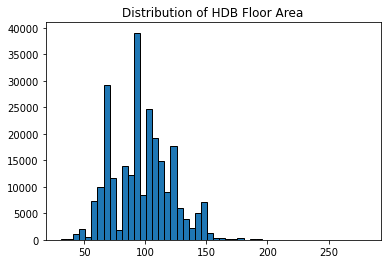

Terrace                 11
Maisonette               3
Executive Maisonette     2
Name: flat_model, dtype: int64

In [316]:
plt.hist(prices['floor_area_sqm'],bins=50,edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()
display(prices.loc[prices['floor_area_sqm']>200]['flat_model'].value_counts())

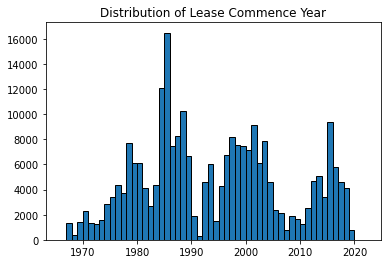

In [317]:
bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

<a id='Inflation'></a>
### 2.1. Inflation Adjustment Using CPI

In [318]:
cpi['month'] = pd.to_datetime(cpi['month'],format = '%Y %b')
prices = prices.merge(cpi,on='month',how='left')
prices['real_price'] = (prices['resale_price'] / prices['cpi']) * 100 

prices

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN,108.319,230799.767354
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN,108.319,244647.753395
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN,108.319,290807.706866
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN,108.319,295423.702213
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN,108.319,296346.901282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250440,2023-05-01,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0,63 years 06 months,110.904,747493.327563
250441,2023-05-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63 years 06 months,110.904,770937.026618
250442,2023-07-01,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63 years 07 months,110.214,780300.143357
250443,2023-01-01,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63 years 11 months,108.488,995501.806651


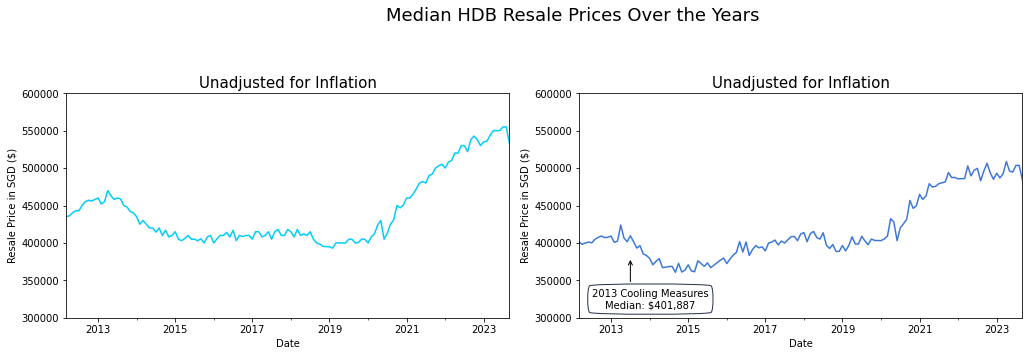

In [319]:
fig = plt.figure(figsize = (16,5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize = 18)
ax1 = fig.add_subplot(121)
prices.groupby('month')['resale_price'].median().plot(ax=ax1, color = '#00cef6', legend = None)
ax1.set_xlabel('Date')
ax1.set_ylabel('Resale Price in SGD ($)')
ax1.set_ylim(300000,600000)
ax1.set_title('Unadjusted for Inflation', size=15)


ax2 = fig.add_subplot(122)
prices.groupby('month')['real_price'].median().plot(ax=ax2,color = '#3c78d8', legend = None )
ax2.set_xlabel('Date')
ax2.set_ylabel('Resale Price in SGD ($)')
ax2.set_ylim(300000,600000)
ax2.set_title('Unadjusted for Inflation', size=15)

ax2.annotate('1997 Asian Financial Crisis\nMedian: $403,766', xy=('1997-05-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('2013 Cooling Measures\nMedian: $401,887', xy=('2013-07-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(20,-50), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
# for ax, color in zip([ax1, ax2], ['#3c78d8', '#3c78d8']):
#     plt.setp(tuple(ax.spines.values()), color=color)
#     plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)
plt.show()

In [320]:
# Convert remaining_lease to number of years
# def getYears(text):
#     if isinstance(text, str):
#         yearmonth = [int(s) for s in text.split() if s.isdigit()]
#         if len(yearmonth) > 1: # if there's year and month
#             years = yearmonth[0] + (yearmonth[1]/12)
#         else: # if only year
#             years = yearmonth[0]
#         return years
#     else: # if int
#         return text

# prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: getYears(x))

prices['remaining_lease'] = 99 - (prices['month'].dt.year - prices['lease_commence_date'])
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250445 entries, 0 to 250444
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                250445 non-null  datetime64[ns]
 1   town                 250445 non-null  object        
 2   flat_type            250445 non-null  object        
 3   block                250445 non-null  object        
 4   street_name          250445 non-null  object        
 5   storey_range         250445 non-null  object        
 6   floor_area_sqm       250445 non-null  float64       
 7   flat_model           250445 non-null  object        
 8   lease_commence_date  250445 non-null  int64         
 9   resale_price         250445 non-null  float64       
 10  remaining_lease      250445 non-null  int64         
 11  cpi                  250445 non-null  float64       
 12  real_price           250445 non-null  float64       
dtypes: datetime64[

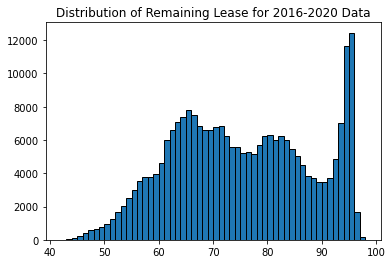

In [321]:
bins = prices['remaining_lease'].max() - prices['remaining_lease'].min()
plt.hist(prices['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 2016-2020 Data')
plt.show()

<a id='EDA'></a>
# 3. Exploratory Data Analysis

<a id='Amenities_Dist'></a>
## 3.1. By Distance to Nearest Amenities

In [322]:
flat_amenities = pd.read_csv('Data/flat_amenities.csv')

# merge amenities data to flat data
prices['year'] = pd.DatetimeIndex(prices['month']).year # extract out year
prices_2015_onwards = prices.loc[prices['year'] > 2015]
prices_2015_onwards['flat'] = prices_2015_onwards['block'] + ' ' + prices_2015_onwards['street_name']
prices_2015_onwards = prices_2015_onwards.merge(flat_amenities, on='flat', how='left')

d_region = {'ANG MO KIO':'North East', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}
prices_2015_onwards['region'] = prices_2015_onwards['town'].map(d_region)
colors = {'North East':'Purple', 'East':'Green', 'Central':'Brown', 'West':'Red', 'North':'Orange'}

prices_2015_onwards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180462 entries, 0 to 180461
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                180462 non-null  datetime64[ns]
 1   town                 180462 non-null  object        
 2   flat_type            180462 non-null  object        
 3   block                180462 non-null  object        
 4   street_name          180462 non-null  object        
 5   storey_range         180462 non-null  object        
 6   floor_area_sqm       180462 non-null  float64       
 7   flat_model           180462 non-null  object        
 8   lease_commence_date  180462 non-null  int64         
 9   resale_price         180462 non-null  float64       
 10  remaining_lease      180462 non-null  int64         
 11  cpi                  180462 non-null  float64       
 12  real_price           180462 non-null  float64       
 13  year          


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
FixedFormatter should only be used together with FixedLocator


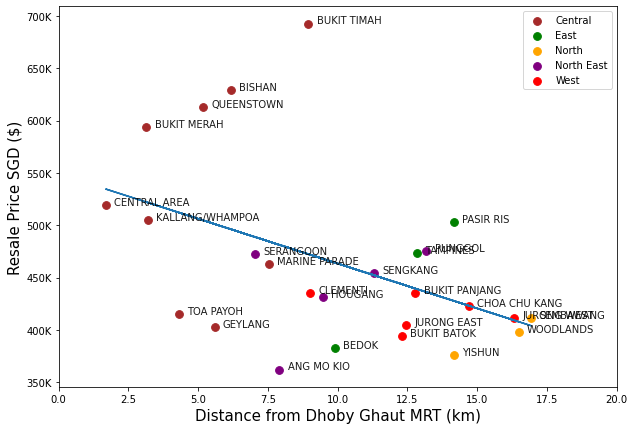

In [323]:
# get median info of each town
tmp = prices_2015_onwards.groupby('town')[['dist_dhoby','school_dist','num_school_2km','mrt','mrt_dist','num_mrt_2km','supermarket_dist','num_supermarket_2km','resale_price','real_price']].median().reset_index()
tmp['region'] = tmp['town'].map(d_region)

fig, ax = plt.subplots(figsize=(10,7))
grouped = tmp.groupby('region')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='dist_dhoby', y='real_price',label=key, color = colors[key], s = 60)


b, a = np.polyfit(tmp['dist_dhoby'], tmp['real_price'], 1)
ax.plot(tmp['dist_dhoby'], a + b* tmp['dist_dhoby'], '-')  
ax.set_xlim([0,20])
ax.set_xlabel('Distance from Dhoby Ghaut MRT (km)', size=15)

ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels), ax.set_ylabel('Resale Price SGD ($)', size=15)
for i, txt in enumerate(tmp['town']):
    ax.annotate(txt, (tmp['dist_dhoby'][i]+0.3, tmp['real_price'][i]), size=10, alpha=0.9)

plt.show()    


The figure layout has changed to tight
FixedFormatter should only be used together with FixedLocator
The figure layout has changed to tight


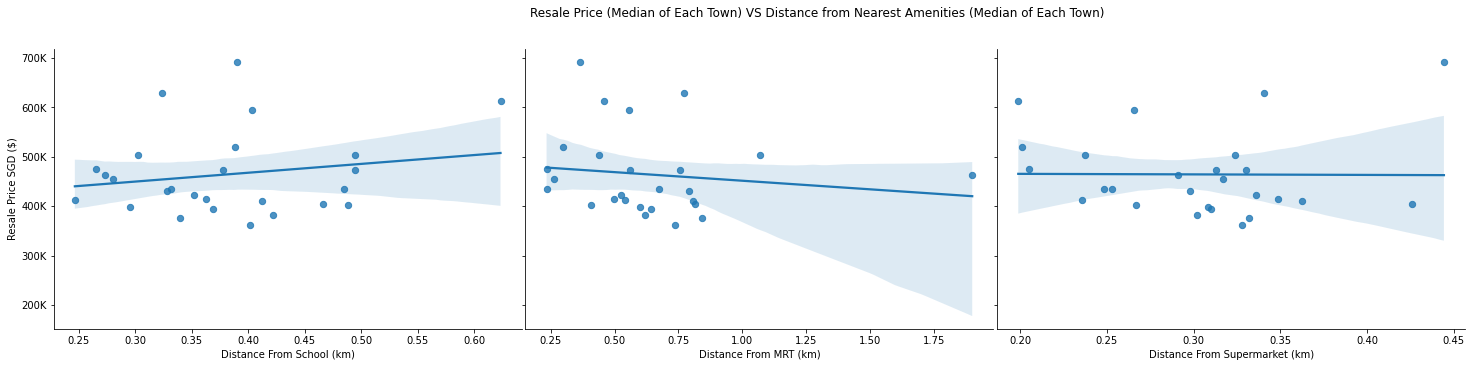

In [324]:
# scatterplot for median price of each town against nearest distance from each amenity

p=sns.pairplot(tmp, x_vars=["school_dist", "mrt_dist", "supermarket_dist"], y_vars=["real_price"], height=5, aspect=1.5, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels)
axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From School (km)', size=10), 
axes[0,1].set_xlabel('Distance From MRT (km)', size=10), 
axes[0,2].set_xlabel('Distance From Supermarket (km)', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Distance from Nearest Amenities (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

The figure layout has changed to tight
FixedFormatter should only be used together with FixedLocator
The figure layout has changed to tight


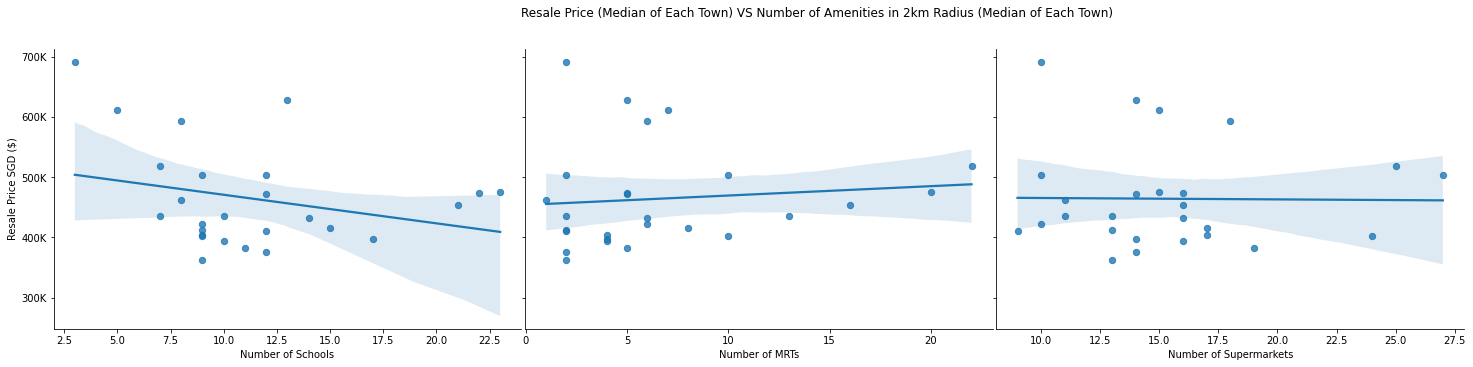

In [325]:
# scatterplot for median price of each town against number of amenities

p=sns.pairplot(tmp, x_vars=["num_school_2km", "num_mrt_2km", "num_supermarket_2km"], y_vars=["real_price"], height=5, aspect=1.5, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of Schools', size=10)
axes[0,1].set_xlabel('Number of MRTs', size=10) 
axes[0,2].set_xlabel('Number of Supermarkets', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Number of Amenities in 2km Radius (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

<a id='Prep'></a>
# 4. Data Preparation

<a id='Encode'></a>
## 4.1. Use relevant columns for building model

In [326]:
#Get storey range as a continuous number 
def get_storey_mid(storey_range):
    storey_range_low = int(storey_range[:2])
    storey_range_high = int(storey_range[-2:])
    storey_range_mid = (storey_range_low + storey_range_high)/2
    return int(storey_range_mid)

prices_2015_onwards['storey'] = prices_2015_onwards['storey_range'].apply(get_storey_mid)

df = prices_2015_onwards[['town', 'flat_type', 'storey', 'floor_area_sqm', 'flat_model', 'lease_commence_date','remaining_lease', 'year', 'school_dist', 'num_school_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 'dist_dhoby', 'region', 'cpi', 'resale_price']]
df



,town,flat_type,storey,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,year,school_dist,num_school_2km,mrt_dist,num_mrt_2km,supermarket_dist,num_supermarket_2km,dist_dhoby,region,cpi,resale_price
0,ANG MO KIO,2 ROOM,8,44.0,Improved,1979,62,2016,0.218125,16,1.000219,4,0.387273,15,6.998338,North East,107.417,230000.0
1,ANG MO KIO,2 ROOM,2,44.0,Improved,1978,61,2016,0.245933,8,1.325246,2,0.351351,10,8.245491,North East,107.417,240000.0
2,ANG MO KIO,3 ROOM,2,60.0,Improved,1986,69,2016,0.249238,8,1.277810,2,0.341303,9,8.317703,North East,107.417,276000.0
3,ANG MO KIO,3 ROOM,2,67.0,New Generation,1980,63,2016,0.801168,10,1.077121,2,0.613983,13,8.057073,North East,107.417,280000.0
4,ANG MO KIO,3 ROOM,2,73.0,New Generation,1977,60,2016,0.351749,9,1.449881,2,0.262522,13,7.867823,North East,107.417,285000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180457,YISHUN,EXECUTIVE,2,154.0,Maisonette,1987,63,2023,0.353168,7,0.292266,2,0.292264,11,12.849099,North,110.904,829000.0
180458,YISHUN,EXECUTIVE,8,146.0,Maisonette,1987,63,2023,0.501914,7,0.403882,2,0.316224,11,12.723958,North,110.904,855000.0
180459,YISHUN,EXECUTIVE,2,146.0,Maisonette,1988,64,2023,0.324934,10,0.148717,2,0.148717,12,12.979121,North,110.214,860000.0
180460,YISHUN,MULTI GENERATION,8,179.0,Multi Generation,1987,63,2023,0.221650,12,0.863114,2,0.623111,15,13.245169,North,108.488,1080000.0


<a id='Encode'></a>
## 4.2. Label & Dummy Encoding

The figure layout has changed to tight
The figure layout has changed to tight
The figure layout has changed to tight


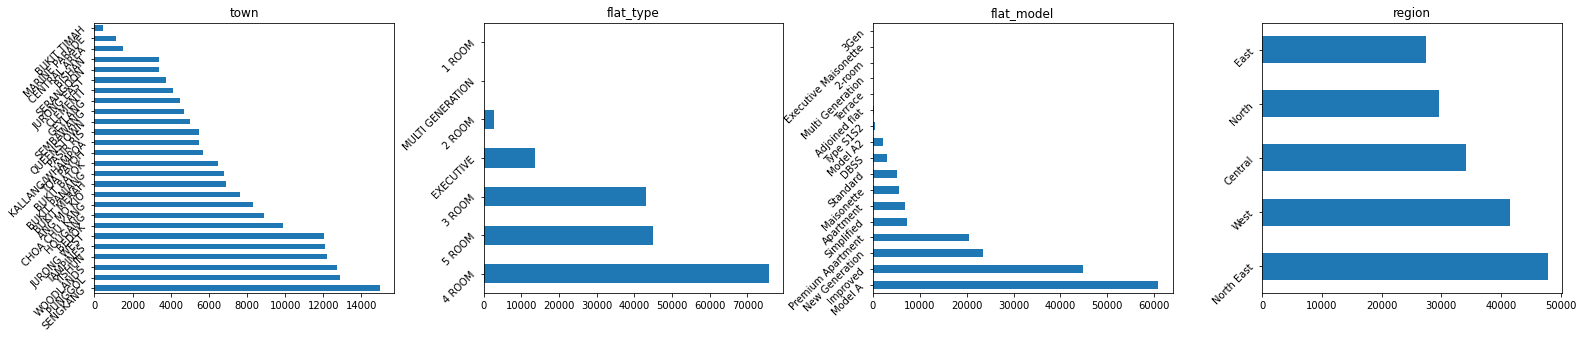

In [327]:
# Frequency plots for catergorical features
fig = plt.figure(figsize=(30,5))
for count, col in enumerate(df.select_dtypes(include=['category','object']).columns):
    fig.add_subplot(1,5,count+1)
    df[col].value_counts().plot.barh()
    plt.title(col)
    plt.yticks(rotation=45)
    plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

In [328]:
# # label encode storeys
# df = df.sort_values(by='storey_range')
# df['storey_range'] = df['storey_range'].astype('category').cat.codes # label encode

# remove flat types with very few cases
df = df[~df['flat_type'].isin(['MULTI GENERATION', '1 ROOM'])]

# Re-categorize flat model to reduce num classes
replace_values = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special', '3Gen':'Special',
                    'Type S1S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
df = df.replace({'flat_model': replace_values})

# Label encode flat type
replace_values = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, 'EXECUTIVE':4}
df = df.replace({'flat_type': replace_values})

df = df.reset_index(drop=True)
display(df['flat_model'].value_counts())


Model A           70245
Standard          49871
Apartment         27335
New Generation    23386
Maisonette         5555
Special            3927
Name: flat_model, dtype: int64

In [329]:
## dummy encoding
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline
df = pd.get_dummies(df, columns=['flat_model'], prefix=['model'])
df= df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline


<a id='RF'></a>
# 5. Model Building - Random Forest

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180319 entries, 0 to 180318
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   town                  180319 non-null  object 
 1   flat_type             180319 non-null  int64  
 2   storey                180319 non-null  int64  
 3   floor_area_sqm        180319 non-null  float64
 4   lease_commence_date   180319 non-null  int64  
 5   remaining_lease       180319 non-null  int64  
 6   year                  180319 non-null  int64  
 7   school_dist           180319 non-null  float64
 8   num_school_2km        180319 non-null  int64  
 9   mrt_dist              180319 non-null  float64
 10  num_mrt_2km           180319 non-null  int64  
 11  supermarket_dist      180319 non-null  float64
 12  num_supermarket_2km   180319 non-null  int64  
 13  dist_dhoby            180319 non-null  float64
 14  cpi                   180319 non-null  float64
 15  

In [331]:
from sklearn.model_selection import train_test_split

# Train Test Split
y = df[['resale_price']]
X = df.drop(['resale_price','town', 'year'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state=0)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (162287, 22)
Shape of X_test: (18032, 22)
Shape of y_train: (162287, 1)
Shape of y_test: (18032, 1)


In [332]:
X_test.columns

Index(['flat_type', 'storey', 'floor_area_sqm', 'lease_commence_date',
       'remaining_lease', 'school_dist', 'num_school_2km', 'mrt_dist',
       'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 'dist_dhoby',
       'cpi', 'region_East', 'region_North', 'region_North East',
       'region_West', 'model_Apartment', 'model_Maisonette', 'model_Model A',
       'model_New Generation', 'model_Special'],
      dtype='object')

<a id='RF_OOB'></a>
## 5.1. Out-Of-Bag

In [333]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)
predicted_train = rf.predict(X_train)

print(f'Out-of-bag R\u00b2 score estimate: {rf.oob_score_:>5.3}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Out-of-bag R² score estimate:  0.97


In [334]:
# predict and get evaluation metrics on test set
predicted_test = rf.predict(X_test)
oob_test_score = r2_score(y_test['resale_price'], predicted_test)
spearman = spearmanr(y_test['resale_price'], predicted_test)
pearson = pearsonr(y_test['resale_price'], predicted_test)
oob_mae = mean_absolute_error(y_test['resale_price'], predicted_test)

print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')

Test data R² score: 0.969
Test data Spearman correlation: 0.984
Test data Pearson correlation: 0.984
Test data Mean Absolute Error: 20274


<a id='RF_CV'></a>
## 5.2. K-fold Cross Validation

In [335]:
# from sklearn.model_selection import GridSearchCV

# # validation by k-fold cross validation with grid search for best hyperparameters
# # hyperparameter values shown below are the tuned final values
# param_grid = {    
#     'max_depth': [20], # max number of levels in each decision tree
#     'min_samples_split': [15], # min number of data points placed in a node before the node is split
#     'min_samples_leaf': [2]} # min number of data points allowed in a leaf node
# rfr =GridSearchCV(RandomForestRegressor(n_estimators = 500, n_jobs=-1, random_state=0),
#                         param_grid, cv=10, scoring='r2', return_train_score=True)
# rfr.fit(X_train,y_train)
# print("Best parameters set found on Cross Validation:\n\n", rfr.best_params_)
# print("\nCross Validation R\u00b2 score:\n\n", rfr.best_score_.round(3))

In [336]:
# # predict and get evaluation metrics for test set

# cv_predicted_test = rfr.predict(X_test)

# cv_test_score = r2_score(y_test['resale_price'], cv_predicted_test)
# spearman = spearmanr(y_test['resale_price'], cv_predicted_test)
# pearson = pearsonr(y_test['resale_price'], cv_predicted_test)
# cv_mae = mean_absolute_error(y_test['resale_price'], cv_predicted_test)

# print(f'Test data R\u00b2 score: {cv_test_score:>5.3}')
# print(f'Test data Spearman correlation: {spearman[0]:.3}')
# print(f'Test data Pearson correlation: {pearson[0]:.3}')
# print(f'Test data Mean Absolute Error: {round(cv_mae)}')

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'Tuned Using Out-Of-Bag')

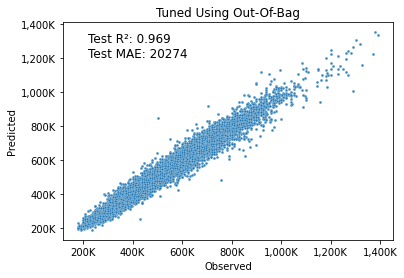

In [337]:
fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x = y_test['resale_price'], y = predicted_test, edgecolor = 'w', alpha = 0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_test_score,3)) + '\nTest MAE: ' + str(round(oob_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')


# ax2 = plt.subplot(122)
# ax2 = sns.scatterplot(x=y_test['resale_price'], y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
# ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
# ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
# ax2.annotate('Test R\u00b2: ' + str(round(cv_test_score,3)) + '\nTest MAE: ' + str(round(cv_mae)), xy=(0, 1), xytext=(25, -35),
#     xycoords='axes fraction', textcoords='offset points', fontsize=12)
# ax2.set_title('Tuned Using Cross Validation')
# plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])



<a id='RF_Importance'></a>
## 5.3. Feature Importance

Text(0.5, 1.0, 'OOB Feature Importance')

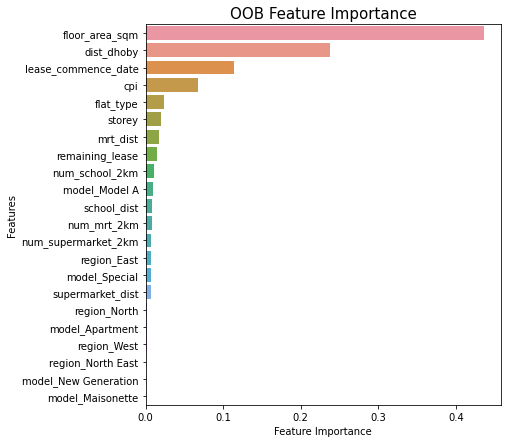

In [338]:
fig = plt.figure(figsize=(14,7))

ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance', size=15)

# ax2 = plt.subplot(122)
# feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
# sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
# ax2.set_title('CV Feature Importance', size=15)

# plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
# fig.show()

<a id='SHAP'></a>
## 5.4. SHAP Values

We can also look at feature importance using SHAP (SHapley Additive exPlanations) values first proposed by [Lundberg and Lee (2006)](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf) for model interpretability of any machine learning model. SHAP values have a few advantages:

1. Directionality — Unlike the feature importance from random forest, SHAP values allows us to see the importance of a feature and the direction in which it influences the outcome 
2. Global interpretability — the collective SHAP values can show how much each predictor contributes to the entire dataset (this is not shown here as it takes a long time for a large dataset)
3. Local interpretability — each observation gets its own SHAP values, allowing us to identify which features are more important for each observation
4. SHAP values can be calculated for any tree-based model, which other methods are not able to do

Below shows the contributors to resale price for an example of low, middle and high resale price flats.

In [339]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(rf)
# explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[16]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[16]])

In [340]:
explainer = shap.TreeExplainer(rf)
# explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[5]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[5]])

In [341]:
explainer = shap.TreeExplainer(rf)
# explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[172]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[172]])

In [342]:
print("Flat Type Encoding = 2 ROOM:0, 3 ROOM:1, 4 ROOM:2, 5 ROOM:3, EXECUTIVE:4")

Flat Type Encoding = 2 ROOM:0, 3 ROOM:1, 4 ROOM:2, 5 ROOM:3, EXECUTIVE:4


In [343]:
# Save model

# import pickle
import joblib

# pickle.dump(rfr.best_estimator_, open('hdb_prices_rf_model.sav', 'wb'))
joblib.dump(rf, 'rf_compressed.pkl', compress=3) # smaller size


['rf_compressed.pkl']

In [344]:
joblib.dump(explainer, 'shap_explainer.pkl')

['shap_explainer.pkl']

<a id='PredictNew'></a>
## 5.5. Predict New Value

In [345]:
from utils_functions import find_postal, find_nearest, dist_from_location, map, map_flats_year, _max_width_
import datetime
import joblib

In [346]:
# Load Model:
model_rf = joblib.load('rf_compressed.pkl')
model_rf.feature_names_in_

array(['flat_type', 'storey', 'floor_area_sqm', 'lease_commence_date',
       'remaining_lease', 'school_dist', 'num_school_2km', 'mrt_dist',
       'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km',
       'dist_dhoby', 'cpi', 'region_East', 'region_North',
       'region_North East', 'region_West', 'model_Apartment',
       'model_Maisonette', 'model_Model A', 'model_New Generation',
       'model_Special'], dtype=object)

Text(0.5, 1.0, 'OOB Feature Importance')

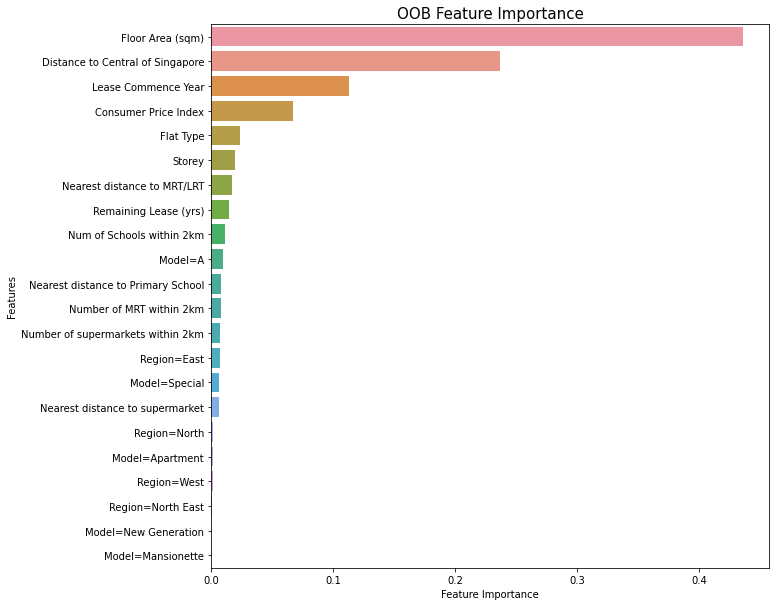

In [396]:
feature = model_rf.feature_names_in_
feature_mapping = {'flat_type': 'Flat Type', 'storey':'Storey', 'floor_area_sqm':'Floor Area (sqm)', 
                   'lease_commence_date':'Lease Commence Year', 'remaining_lease':'Remaining Lease (yrs)', 
                   'school_dist':'Nearest distance to Primary School', 'num_school_2km':'Num of Schools within 2km', 
                   'mrt_dist':'Nearest distance to MRT/LRT', 'num_mrt_2km':'Number of MRT within 2km',
                   'supermarket_dist':'Nearest distance to supermarket', 'num_supermarket_2km':'Number of supermarkets within 2km',
                   'dist_dhoby':'Distance to Central of Singapore', 'cpi':'Consumer Price Index', 
                   'region_East':'Region=East', 'region_North':'Region=North',
                   'region_North East':'Region=North East', 'region_West':'Region=West',
                   'model_Apartment':'Model=Apartment','model_Maisonette':'Model=Mansionette', 
                   'model_Model A':'Model=A', 'model_New Generation':'Model=New Generation',
                   'model_Special':'Model=Special'}

feature_names = [feature_mapping[key] for key in feature]


# Plot Feature Importance:
fig = plt.figure(figsize=(10,10))
feat_imp = pd.DataFrame({'Features': feature_names, 'Feature Importance': model_rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
plt.title('OOB Feature Importance', size=15)

In [388]:
# flat_address = '670472'
# town = 'BUKIT PANJANG'
# flat_model = 'Apartment'
# flat_type = '5 ROOM'
# floor_area = 110.0
# storey = 2
# lease_commence_date = 2002


# flat_address = '172 Ang Mo Kio Ave 4'
# town = 'Ang Mo Kio'
# flat_model = 'Improved'
# flat_type = '2 ROOM'
# floor_area = 45.0
# storey = 5
# lease_commence_date = 1986


# flat_address = '457 ANG MO KIO AVE 10'
# town = 'Ang Mo Kio'
# flat_model = 'Adjoined flat'
# flat_type = 'EXECUTIVE'
# floor_area = 176
# storey = 15
# lease_commence_date = 1980


flat_address = '209 bukit batok st 21'
town = 'BUKIT BATOK'
flat_model = 'Model A'
flat_type = '4 ROOM'
floor_area = 107
storey = 1
lease_commence_date = 1985

In [400]:
# Get flat coordinate:
coord = find_postal(flat_address)
try:
    flat_coord = pd.DataFrame({'address':[coord.get('results')[0].get('ADDRESS')],
                            'LATITUDE':[coord.get('results')[0].get('LATITUDE')], 
                            'LONGITUDE':[coord.get('results')[0].get('LONGITUDE')]})
except IndexError:
    st.error('Oops! Address is not valid! Please enter a valid address!')
    pass

def load_data(filepath):
    return pd.read_csv(filepath)

supermarket_coord = load_data('Data/supermarket_coordinates_clean.csv')
school_coord = load_data('Data/school_coordinates_clean.csv')
# hawker_coord = load_data('Data/hawker_coordinates_clean.csv')
# shop_coord = load_data('Data/shoppingmall_coordinates_clean.csv')
# park_coord = load_data('Data/parks_coordinates_clean.csv')
mrt_coord = load_data('Data/MRT_coordinates.csv')[['STN_NAME','Latitude','Longitude']]
cpi = pd.read_csv('Data/CPI.csv')


## Get nearest and number of amenities in 2km radius
# Supermarkets
nearest_supermarket,supermarkets_2km = find_nearest(flat_coord, supermarket_coord)
flat_supermarket = pd.DataFrame.from_dict(nearest_supermarket).T
flat_supermarket = flat_supermarket.rename(columns={0: 'flat', 1: 'supermarket', 2: 'supermarket_dist',
                                                    3: 'num_supermarket_2km'}).reset_index().drop(['index'], axis=1)
supermarkets_2km['type'] = ['Supermarket']*len(supermarkets_2km)

# Primary Schools
nearest_school,schools_2km = find_nearest(flat_coord, school_coord)
flat_school = pd.DataFrame.from_dict(nearest_school).T
flat_school = flat_school.rename(columns={0: 'flat', 1: 'school', 2: 'school_dist',
                                          3: 'num_school_2km'}).reset_index().drop('index', axis=1)
schools_2km['type'] = ['School']*len(schools_2km)

# MRT
nearest_mrt,mrt_2km = find_nearest(flat_coord, mrt_coord)
flat_mrt = pd.DataFrame.from_dict(nearest_mrt).T
flat_mrt = flat_mrt.rename(columns={0: 'flat', 1: 'mrt', 2: 'mrt_dist',
                                    3: 'num_mrt_2km'}).reset_index().drop('index', axis=1)
mrt_2km['type'] = ['MRT']*len(mrt_2km)

amenities = pd.concat([supermarkets_2km, schools_2km,mrt_2km])
amenities = amenities.rename(columns={'lat':'LATITUDE', 'lon':'LONGITUDE'})

# Distance from Dhoby Ghaut
dist_dhoby = dist_from_location(flat_coord, (1.299308, 103.845285))
flat_coord['dist_dhoby'] = [list(dist_dhoby.values())[0][1]]

## Concat all dataframes
flat_coord = pd.concat([flat_coord, flat_supermarket.drop(['flat'], axis=1), 
                        flat_school.drop(['flat'], axis=1),
                        flat_mrt.drop(['flat'], axis=1)],
                       axis=1)
# st.dataframe(flat_coord)

## ENCODING VARIABLES
# Flat Type
replace_values = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, 'EXECUTIVE':4}
flat_coord['flat_type'] = replace_values.get(flat_type)

# Get Storey
flat_coord['storey'] = storey

# Floor Area
flat_coord['floor_area_sqm'] = floor_area

# Lease commence date
flat_coord['lease_commence_date'] = lease_commence_date


# Remaining lease:
flat_coord['remaining_lease'] = 99 - (datetime.datetime.now().year - lease_commence_date)

# Consumer Price Index (cpi):
flat_coord['cpi'] = cpi.iloc[-1]['cpi']

d_region = {'ANG MO KIO':'North East', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}
region_dummy = {'region_East':[0], 'region_North':[0], 'region_North East':[0], 'region_West':[0]}
region = d_region.get(town)
if region == 'East': region_dummy['region_East'][0] += 1
elif region == 'North': region_dummy['region_North'][0] += 1
elif region == 'North East': region_dummy['region_North East'][0] += 1
elif region == 'West': region_dummy['region_West'][0] += 1
#region_dummy
flat_coord = pd.concat([flat_coord, pd.DataFrame.from_dict(region_dummy)], axis=1)

# Flat Model
replace_values = {'Model A':'model_Model A', 'Simplified':'model_Model A', 'Model A2':'model_Model A', 
                  'Standard':'Standard', 'Improved':'Standard', '2-room':'Standard',
                  'New Generation':'model_New Generation',
                  'Apartment':'model_Apartment', 'Premium Apartment':'model_Apartment',
                  'Maisonette':'model_Maisonette', 'Executive Maisonette':'model_Maisonette', 
                  'Special':'model_Special', 'Terrace':'model_Special', 'Adjoined flat':'model_Special', 
                    'Type S1S2':'model_Special', 'DBSS':'model_Special','3Gen':'model_special'}
d = {'model_Apartment':[0], 'model_Maisonette':[0], 'model_Model A':[0], 'model_New Generation':[0], 'model_Special':[0]}
if replace_values.get(flat_model) != 'Standard': d[replace_values.get(flat_model)][0] += 1


df = pd.DataFrame.from_dict(d)
flat_coord = pd.concat([flat_coord, pd.DataFrame.from_dict(d)], axis=1)
flat_coord['selected_flat'] = [1] # for height of building


# flat1 = flat_coord[['flat_type', 'storey_range', 'floor_area_sqm', 'lease_commence_date',
#        'school_dist', 'num_school_2km', 'hawker_dist', 'num_hawker_2km',
#        'park_dist', 'num_park_2km', 'mall_dist', 'num_mall_2km', 'mrt_dist',
#        'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 'dist_dhoby',
#        'region_East', 'region_North', 'region_North East', 'region_West',
#        'model_Apartment', 'model_Maisonette', 'model_Model A',
#        'model_New Generation', 'model_Special']]

flat1 = flat_coord[['flat_type', 'storey', 'floor_area_sqm', 'lease_commence_date',
       'remaining_lease','school_dist', 'num_school_2km', 'mrt_dist',
       'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 
       'dist_dhoby','cpi','region_East', 'region_North', 
       'region_North East', 'region_West',
       'model_Apartment', 'model_Maisonette', 'model_Model A',
       'model_New Generation', 'model_Special']]
display(flat1)
flat1_predict = model_rf.predict(flat1)
print(f'The predicted current resale price = SG${flat1_predict[0]:.0f}')

,flat_type,storey,floor_area_sqm,lease_commence_date,remaining_lease,school_dist,num_school_2km,mrt_dist,num_mrt_2km,supermarket_dist,...,cpi,region_East,region_North,region_North East,region_West,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Special
0,2,1,107,1985,61,0.550022,11,0.403367,5,0.362446,...,110.214,0,0,0,1,0,0,1,0,0


ValueError: Invalid format specifier

In [404]:
print(f'The predicted current resale price = SG${flat1_predict[0]:,.0f}')

The predicted current resale price = SG$512,859
